#  Un nuevo modelo - K-Nearest Neighbors 💨🤯 


 [K-Nearest Neighbors (or KNN)](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) es un modelo basado en la distancia que se puede usar tanto para la regresión (predecir un número) como para la clasificación (predecir una categoría)."
]

**¿Y la mejor parte?** ¡Los pasos son exactamente los mismos para el modelo KNN que para la regresión lineal 😎😎

 1. Comenzemos por importar  las bibliotecas de Python necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Pongamos y leamos los datos de **CSV** en un  DataFrame

In [18]:
churn = pd.read_csv('datos/churn.csv')
churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,608,1,41,1,83807.86,1,0,1,112542.58,0
1,502,1,42,8,159660.80,3,1,0,113931.57,1
2,850,1,43,2,125510.82,1,1,1,79084.10,0
3,645,0,44,8,113755.78,2,1,0,149756.71,1
4,376,1,29,4,115046.74,4,1,0,119346.88,1


In [3]:
from sklearn.neighbors import KNeighborsClassifier # Importamos el modelo de Scikit-learn:

Inicializamos el modelo y eligimos una cantidad de **n_neighbors** para compararlos:

In [4]:
model = KNeighborsClassifier(n_neighbors=3)

Creamos nuestras `entradas` y `salidas`. Llamandolos `x` e `y`:

In [5]:
x = churn.drop(["Exited"], axis="columns") # dejando la columna de salida para crear las entradas (características)
y = churn["Exited"]

Revisamos la  **x**  e **y** a continuación 👇

In [6]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,608,1,41,1,83807.86,1,0,1,112542.58
1,502,1,42,8,159660.80,3,1,0,113931.57
2,850,1,43,2,125510.82,1,1,1,79084.10
3,645,0,44,8,113755.78,2,1,0,149756.71
4,376,1,29,4,115046.74,4,1,0,119346.88
...,...,...,...,...,...,...,...,...,...
6378,597,1,53,4,88381.21,1,1,0,69384.71
6379,644,0,28,7,155060.41,1,1,0,29179.52
6380,516,0,35,10,57369.61,1,1,1,101699.77
6381,772,0,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       0
1       1
2       0
3       1
4       1
       ..
6378    1
6379    0
6380    0
6381    1
6382    0
Name: Exited, Length: 6383, dtype: int64

💡Consejo: intente ajustar el número  - n_neighbors - arriba hasta que obtenga el mejor resultado.

In [8]:
model.fit(x,y) # Modelo de entrenamiento

KNeighborsClassifier(n_neighbors=3)

In [9]:
model.score(x,y) # resultado del modelo de entrenamiento

0.8171706094313019

Esta métrica de puntuación de tiempo es la precisión: cuántas predicciones acertó el modelo en nuestro conjunto de datos.



¿Cómo es tu puntuación? Bastante genial para pocas lineas de codigo, ¿verdad? 🤩Bueno...

## ¡Hemos estado haciendo trampa! 😳

Hemos estado puntuando el modelo con los mismos datos con los que se entrenó, ¡demasiado fácil! Eso se llama fuga de datos(**data leakage**).

![title](Img/Data_Leakage.jpeg)

La biblioteca Scikit-learn nos salva de nuevo: importemos y usemos el [`train_test_split` metodo](https://scikit-learn.org/0.24/modules/generated/sklearn.model_selection.train_test_split.html)

In [10]:
from sklearn.model_selection import train_test_split


El método `train_test_split` nos brinda todos los conjuntos de datos que necesitamos: entradas y salidas tanto para entrenamiento como para prueba. Entonces creamos simultáneamente cuatro nuevas variables para almacenar eso.

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)


###  ¡Esta vez sin trampas! 🚀

Ahora que tenemos conjuntos de datos de entrenamiento y prueba, debe **iniciar** un nuevo modelo, **entrenar** y **puntuar** nuevamente con los conjuntos de datos correctos.

In [12]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(xtrain, ytrain) # usando solo los datos de entrenamiento
model.score(xtest, ytest) # usar datos de prueba no vistos para calificar

0.6789350039154268

### ¡Predicción! 🚀

La predicción también funciona exactamente como el modelo anterior, así que le permitimos hacerlo. Creamos un cliente de ejemplo que puede ajustar.

*Nota: el orden de las características es:*

`['CreditScore', 'Gender', 'Edad', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']`

In [13]:
customer = [[608.0, 1.0, 31.0, 20.0, 81207.86, 2.0, 1.0, 0.0, 111142.58]]


In [14]:
model.predict(customer)

array([0], dtype=int64)

In [15]:
model.predict_proba(customer)

array([[0.66666667, 0.33333333]])


### ¿Explicabilidad? Ya más duro con el modelo KNN 😓

Necesitamos usar un método [feature permutation](https://scikit-learn.org/0.24/modules/generated/sklearn.inspection.permutation_importance.html) proporcionado por `Scikit-learn`.

Este método ejecuta la puntuación del modelo muchas veces, cambiando (*permutando*) una característica a la vez, para ver cuál causa el mayor cambio en el objetivo.

In [17]:
from sklearn.inspection import permutation_importance

permutation_score = permutation_importance(model, xtrain, ytrain, n_repeats=10)

np.vstack((x.columns, permutation_score.importances_mean)).T

array([['CreditScore', 0.0004896200548374808],
       ['Gender', 0.0],
       ['Age', 0.0],
       ['Tenure', 0.0],
       ['Balance', 0.12661574618096363],
       ['NumOfProducts', 0.0],
       ['HasCrCard', 0.0],
       ['IsActiveMember', 0.0],
       ['EstimatedSalary', 0.12471602036819433]], dtype=object)


# ¡Felicitaciones por sus primeros modelos de ML, héroes!   ‍🦸‍♀️🦸‍♂️

<AxesSubplot:xlabel='EstimatedSalary', ylabel='CreditScore'>

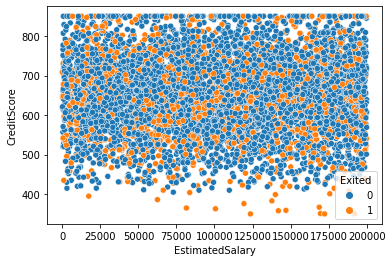

In [43]:
sns.scatterplot(data=churn, x='EstimatedSalary', y='CreditScore', hue='Exited')

## 🕵️‍♀️ ¿Vas más allá? (Desafío opcional) ¡KNN solo en columnas categóricas!

Probablemente haya notado que las **columnas categóricas**, como `HasCrCard` o `NumOfProducts`, prácticamente no tienen influencia en el modelo anterior.

Puede ser que sean fuertemente superados por las otras columnas, como 'Saldo' o 'Salario estimado'. Sería una buena idea **crear un nuevo modelo** *solo* para las columnas categóricas.

### Tu turno: ¡construye tu propio modelo! 🚀

Cree un nuevo modelo KNN **desde cero** y repita los pasos hasta llegar a la predicción, pero esta vez **solo en las columnas categóricas**. Los enumeramos a continuación:

`['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender']`

#### **💡Consejo:** ¡No seas tímido para reutilizar lo anterior y adaptarlo al desafío actual!

1. Cree nuestros conjuntos de datos `x` (inputs) e `y` (output)

In [44]:
x = churn.drop(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], axis='columns') # o en lugar de dropear columnas, también podemos seleccionar las que necesitamos:
x = churn[['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender']]

y = churn.Exited

2. Dividir nuestros datos en datos de entrenamiento y prueba con `train_test_split` (*PD: no es necesario `importar` una segunda vez*)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

3. Inicializar un modelo KNN. Elija la cantidad de  `n_neighbors` que desee 🙂

In [23]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [24]:
classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

In [26]:
customer = [[1, 1, 1, 1]]

In [28]:
classifier.predict(customer)# y en otra celda de código:
  
classifier.predict_proba(customer)

array([[1., 0.]])

In [34]:
permutation_score = permutation_importance(classifier, xtrain, ytrain, n_repeats=10)

np.vstack((x.columns, permutation_score.importances_mean)).T

array([['NumOfProducts', 0.05182138660399536],
       ['HasCrCard', -0.00011750881316096029],
       ['IsActiveMember', 0.007931844888366657],
       ['Gender', 0.003916960438699613]], dtype=object)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

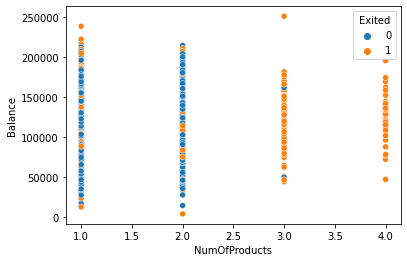

In [40]:
sns.scatterplot(data=churn, x='NumOfProducts', y='Balance', hue='Exited')

Siempre es una buena idea hacer algo de exploración visual primero.🤨😶‍🌫️

En este caso, nos importa si el cliente `salió` o **abandonó**. Así que podemos intentar trazar las diferentes características (entradas) manteniendo la `salida` como el diferenciador de color (matiz).

In [10]:
sns.scatterplot(data=churn, x='PICK A COLUMN', y='PICK ANOTHER COLUMN', hue='Exited')

ValueError: Could not interpret value `PICK A COLUMN` for parameter `x`